In [1]:
# Class IT-533
# Summer 2020
# Final Dataset-  U.S. Women's Labor-Force Participation  
# By Wei Geng(David)
# Created on: 08/07/2020
# Honor Code: “I have neither given or received, nor have I tolerated others' use of unauthorized aid.”

In [2]:
# Convert to pandas DataFrame
import io
import numpy as np
import pandas as pd
from scipy import stats
master_df = pd.read_csv('https://raw.githubusercontent.com/intelspeedstep/AMOD533/master/Mroz.csv')
master_df.head()

,Unnamed: 0,work,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,city,experience
0,1,no,1610,1,0,32,12,3.3540,2.65,2708,34,12,4.0288,16310,12,7,5.0,no,14
1,2,no,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,7,7,11.0,yes,5
2,3,no,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,12,7,5.0,no,15
3,4,no,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,7,7,5.0,no,6
4,5,no,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,12,14,9.5,yes,7


In [3]:
# output the data attributes and its datatypes, plus the shape of the dataset
print(master_df.info(verbose=True))
print(master_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  753 non-null    int64  
 1   work        753 non-null    object 
 2   hoursw      753 non-null    int64  
 3   child6      753 non-null    int64  
 4   child618    753 non-null    int64  
 5   agew        753 non-null    int64  
 6   educw       753 non-null    int64  
 7   hearnw      753 non-null    float64
 8   wagew       753 non-null    float64
 9   hoursh      753 non-null    int64  
 10  ageh        753 non-null    int64  
 11  educh       753 non-null    int64  
 12  wageh       753 non-null    float64
 13  income      753 non-null    int64  
 14  educwm      753 non-null    int64  
 15  educwf      753 non-null    int64  
 16  unemprate   753 non-null    float64
 17  city        753 non-null    object 
 18  experience  753 non-null    int64  
dtypes: float64(4), int64(13), obj

<font color=blue size=5> Question #1: Is there a class attribute in your dataset?  If not, decide what class attribute should there be and then create it.  For what political purposes would someone be interested in this class attribute? (10 points)</font>

Answer: Yes, there are two columns are class variables. 1) work and 2) city
If someone is interest in the study to see what impact women work at home in 1975, then they can use the 'work' variable as the target for deeper analysis or,
if they want to see what makes wife/women lives in a largr city, then they can use the 'city' variable as the target for deeper analysis.
For those two directions of protential studies, they have to use the class attributes listed above, but based on the given data, I would prefer for the first study, which is build a predictive model to study the factors that made women work at home in 1975.

In [4]:
# Check the shape and columns of the master dataset
print("Columns names are : \n", master_df.columns)
master_object=master_df.select_dtypes('object')
print("Shape of the dataframe: ",master_object.shape)
master_object.head()

Columns names are : 
 Index(['Unnamed: 0', 'work', 'hoursw', 'child6', 'child618', 'agew', 'educw',
       'hearnw', 'wagew', 'hoursh', 'ageh', 'educh', 'wageh', 'income',
       'educwm', 'educwf', 'unemprate', 'city', 'experience'],
      dtype='object')
Shape of the dataframe:  (753, 2)


,work,city
0,no,no
1,no,yes
2,no,no
3,no,no
4,no,yes


In [5]:
# Below is to check the value counts and percent of each of the class attributes
for column_name in master_object.columns:
    print("Value counts of the variable {}".format(column_name),":")
    print(master_object[column_name].value_counts())
    print(master_object[column_name].value_counts(normalize=True),'\n')

Value counts of the variable work :
no     428
yes    325
Name: work, dtype: int64
no     0.568393
yes    0.431607
Name: work, dtype: float64 

Value counts of the variable city :
yes    484
no     269
Name: city, dtype: int64
yes    0.642762
no     0.357238
Name: city, dtype: float64 



## <font color=blue size=4> Question #2 List the Minimum, Maximum, Mean, Median, Mode, Q1, Q3, and Standard Deviation for the wagew (wife's wages) and educw (wife's education) attributes belonging to people who with 2 or fewer  young children (child6 =< 2) and with more than 2 young children (child6 > 2).  Which attribute has the smaller standard deviation?  Why does that matter, and what does it tell you about married women's economic contribution in these two groups? (20 points)</font>

Answer: By comparing the measurements for 'wagew' and 'educw', I see that wife's educational attainment,'educw', has smallest standard deviation. Smaller standard deviation tell us that most of the wife's educational attainment are tend to be close to its mean. In other words, the values of the education years have smaller variation from its mean. 
This is very important, because it indicates that the education years does not have much difference from one women to another. If we compare the two groups, we can tell that the difference in education year makes less impact on married women's economic contribution. In other words, having one year less in education doesn't make big negatively impact on their wage.

In [6]:
# create sub dataset for child6 =< 2 and calculate the measurement above.
child_le_2_df=master_df[master_df.child6 <= 2]
print('Dataset with children less or equal to 2 -- its shape :',child_le_2_df.shape)
child_le_2_df.head()

Dataset with children less or equal to 2 -- its shape : (750, 19)


,Unnamed: 0,work,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,city,experience
0,1,no,1610,1,0,32,12,3.3540,2.65,2708,34,12,4.0288,16310,12,7,5.0,no,14
1,2,no,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,7,7,11.0,yes,5
2,3,no,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,12,7,5.0,no,15
3,4,no,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,7,7,5.0,no,6
4,5,no,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,12,14,9.5,yes,7


In [7]:
# Part I: display measurements for wife's wage by wife's educational attainment for child6 =< 2
child_le_2_df.groupby(['educw'])['wagew'].describe().transpose().round(1)

educw,5,6,7,8,9,10,11,12,13,14,15,16,17
count,4.0,6.0,8.0,30.0,25.0,44.0,43.0,381.0,42.0,51.0,13.0,57.0,46.0
mean,0.7,0.8,0.5,1.1,1.2,1.4,1.0,1.7,2.1,1.8,1.5,2.8,4.3
std,1.4,1.3,1.4,1.9,1.5,1.7,1.7,2.1,2.3,2.7,2.9,3.1,3.7
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,0.0,0.0,2.0,4.9
75%,0.7,1.7,0.0,2.3,2.3,2.8,2.7,3.3,3.5,3.8,0.0,4.7,7.1
max,2.8,2.6,4.1,7.2,4.3,5.0,4.6,10.0,8.5,10.0,8.5,10.0,10.0


In [8]:
# Part I: Also,  I look at the measurements for wagew and educw separately
print(child_le_2_df['wagew'].describe().transpose().round(1))
print(child_le_2_df['educw'].describe().transpose().round(1))

count    750.0
mean       1.9
std        2.4
min        0.0
25%        0.0
50%        0.0
75%        3.6
max       10.0
Name: wagew, dtype: float64
count    750.0
mean      12.3
std        2.3
min        5.0
25%       12.0
50%       12.0
75%       13.0
max       17.0
Name: educw, dtype: float64


In [9]:
# Part II: display measurements for wife's wage by wife's educational attainment for child6 =< 2
print("Calculate median for wife's wage by wife's educational attainment for child6 =< 2: \n",
      child_le_2_df.groupby(['educw'])['wagew'].median())
print("Calculate mode for wife's wage by wife's educational attainment for child6 =< 2: \n",
      child_le_2_df['wagew'].mode())

Calculate median for wife's wage by wife's educational attainment for child6 =< 2: 
 educw
5     0.000
6     0.000
7     0.000
8     0.000
9     0.000
10    0.000
11    0.000
12    0.000
13    1.125
14    0.000
15    0.000
16    2.000
17    4.900
Name: wagew, dtype: float64
Calculate mode for wife's wage by wife's educational attainment for child6 =< 2: 
 0    0.0
dtype: float64


In [10]:
# create sub dataset for child6 > 2 and calculate the measurement above.
child_gt_2_df=master_df[master_df.child6 > 2]
print('Dataset with children greater than 2 -- its shape :',child_gt_2_df.shape)
child_gt_2_df.head()

Dataset with children greater than 2 -- its shape : (3, 19)


,Unnamed: 0,work,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,city,experience
483,484,yes,0,3,1,31,13,0.0,0.0,3600,36,17,19.4440,73600,12,16,11.0,no,3
604,605,yes,0,3,3,37,13,0.0,0.0,2419,39,14,5.0434,13440,7,0,5.0,no,4
714,715,yes,0,3,0,31,15,0.0,0.0,3000,34,17,16.6670,51200,7,10,7.5,yes,5


In [11]:
# Part I: display measurements for for wife's wage by wife's educational attainment for child6 > 2
child_gt_2_df.groupby(['educw'])['wagew'].describe().transpose().round(1)

educw,13,15
count,2.0,1.0
mean,0.0,0.0
std,0.0,NaN
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [12]:
# Part I: Also,  I look at the measurements for wagew and educw separately
print(child_gt_2_df['wagew'].describe().transpose().round(1))
print(child_gt_2_df['educw'].describe().transpose().round(1))

count    3.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: wagew, dtype: float64
count     3.0
mean     13.7
std       1.2
min      13.0
25%      13.0
50%      13.0
75%      14.0
max      15.0
Name: educw, dtype: float64


In [13]:
# Part II: display measurements for wife's wage by wife's educational attainment for child6 > 2
print("Calculate median for wife's wage by wife's educational attainment for child6 > 2: \n",
      child_gt_2_df.groupby(['educw'])['wagew'].median())
print("Calculate mode for wife's wage by wife's educational attainment for child6 > 2: \n",
      child_gt_2_df['wagew'].mode())

Calculate median for wife's wage by wife's educational attainment for child6 > 2: 
 educw
13    0.0
15    0.0
Name: wagew, dtype: float64
Calculate mode for wife's wage by wife's educational attainment for child6 > 2: 
 0    0.0
dtype: float64


## <font color=blue size=4> Question #3 For each of the groups above, make a scatterplot against the class attribute and describe in detail how your each of the assigned attributes is correlated to the class attribute (for the purposes of this question, assume that work is your class attribute). (20 points)</font>

Answer: As you can see below, regardless women work from home or not, we see higher wage always positively associates with higher education year, which make sense. The yellow color indicate high wage which shows on the top of the scatter lines(there are two, one for work at home, the other for not work at home.) Since there are only 3 data points has 2 or more children under age 6, the plot has less points, but it shows that those 3 women may not work at all since they have more children. 

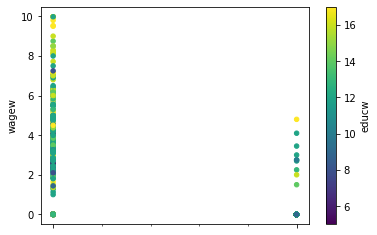

In [14]:
# plo
plot1=child_le_2_df.dropna().plot.scatter(x='work',
                      y='wagew',
                      c='educw',          
                      colormap='viridis')

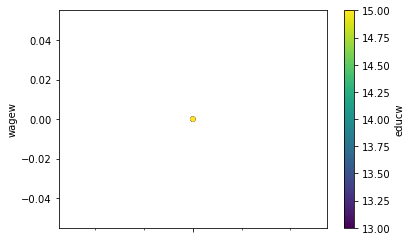

In [15]:
plot2=child_gt_2_df.dropna().plot.scatter(x='work',
                      y='wagew',
                      c='educw', 
                      colormap='viridis')

## <font color=blue size=4> Question #4 Separate the dataset into 25% training data and 75% test data.  Then prepare the training data to run with two of the classifiers below.</font>
#### <br> a.Neural Network </br>
#### <br> b.Naive Bayes</br>
#### <br> c.k Nearest Neighbor</br>
#### <br> d.Random Forest</br>
#### <br> Investigate the confusion matrices.  What do the results tell you about married women's economic contribution in these two groups?  Does such a classification make sense? </br>

Answer:

In [16]:
# 1) KNN handles binary variables, so, I first convert 'work' to a binary value by set value 'Yes' equal to 1, else to 0.
# This 'Work_Ind' become my target variable. Again, this is supervised learning for classification problem.
# 2) No need to check correlation ahead or drop any variables since KNN is not linear model
# 3) split dataset into training and testing with ratio of 75% to 25%.
# 4) Fit the model with all variables in X, and select n to 3. If n is a small number, the model is less stable, but if n is a big number, it would be more errors.
# so, I manually tune the model to pick 3 as the value for n. If you pick 2 or 4, the model accuracy would decline.
# 5) After running the model, we get model accuracy equal to 80% on test dataset. This is a pretty good model. 
# However, there is concern on overfitting since the model as much better performance on the training dataset -- 93%.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
master_df.loc[master_df['work']=='yes','Work_Ind']=1
master_df['Work_Ind'].fillna(0, inplace=True)
master_df.loc[master_df['city']=='yes','City_Ind']=1
master_df['City_Ind'].fillna(0, inplace=True)
X=master_df.drop(['work','city','Unnamed: 0'], axis=1)
y=master_df['Work_Ind']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1859, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set predictions:
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
Training set score: 0.93
Test set score: 0.80


In [17]:
# output the confusion matrix. Based on the my calculation on the precision, it is 0.77 on the test dataset.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[84, 28],
       [ 9, 68]], dtype=int64)

In [18]:
# 1) Random Forest is a probability tree algorthm which uses the ensemble method to build multiple number of decision trees to average out the performance
# This would give us a very stable model, however, it is not difficult to explain the which features are important in which model.
# 2) Again, Random Forest can handle both continuous and categorical target variable , 
# so we set 'Stars' as a binary target variable, and split data with hold-out methold with 75% to 25%
# 3) we also set n_estimator to 100, this means we would split dataset into 30 pieces and build 100 different trees. 
# 4) After running the model, we get model accuracy equal to 78% on the training set and 73% on test set. This is a very good model, but the model 
# generalization is not as good  as the decision tree. To solve this, we canto use some techiques in auto-tuning the model to find the best parameter values 
# that can optimize model, This is another machine learning topic. 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X=master_df.drop(['work','city','Unnamed: 0','City_Ind'], axis=1)
y=master_df['Work_Ind']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1859, test_size=0.25)
forest = RandomForestClassifier(n_estimators=100, random_state=1859)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Training set score: {:.2f}".format(forest.score(X_train, y_train)))
print("Test set score: {:.2f}".format(forest.score(X_test, y_test)))

Test set predictions:
 [1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Training set score: 1.00
Test set score: 1.00


In [19]:
# output the confusion matrix. Based on the my calculation on the precision, it is 1, which indicate a perfect prediction on the test dataset.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[112,   0],
       [  0,  77]], dtype=int64)

Answer:
Based on the confusion matrix and my calcuation of the precision, Random Forest give us much better results than KNN. In fact, it gives a perfect prediction. This means in the dataset, there is a predictor that can accurately indicate who work at home and who is not. 
<br>Further explanation of the theory of the models:
K-nearest neighboer is the supervised learning algorithm that predicts the categorical target based on the majorities of the surrounding datapoints. It requires only one parameter K for the range of the datapoints, and it has an assumption that the data are normally distributed. On the other hand, Random Forest is a probability tree algorthm which uses the ensemble method to build multiple decision trees to average out the performance. It would give us a very stable model, however, it is not difficult to explain the which features are important in which model. </br>


## <font color=blue size=4> Question #5 Using the test data set you have just generated, remove the class attribute and run two of the clustering algorithms below.  Produce a plot of your choice to identify clusters.</font>
#### <br> a.Hierarchical </br>
#### <br> b.kMeans</br>
#### <br>c.DBScan</br>
#### <br>What clusters have you discovered?  Do they make sense?  What do they tell you about married women's economic contribution in these two groups ? (20 points)</br>

In [20]:
# drop class variables for kMean clustering analysis
master_df=master_df.drop(['work','city'], axis=1)
master_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  753 non-null    int64  
 1   hoursw      753 non-null    int64  
 2   child6      753 non-null    int64  
 3   child618    753 non-null    int64  
 4   agew        753 non-null    int64  
 5   educw       753 non-null    int64  
 6   hearnw      753 non-null    float64
 7   wagew       753 non-null    float64
 8   hoursh      753 non-null    int64  
 9   ageh        753 non-null    int64  
 10  educh       753 non-null    int64  
 11  wageh       753 non-null    float64
 12  income      753 non-null    int64  
 13  educwm      753 non-null    int64  
 14  educwf      753 non-null    int64  
 15  unemprate   753 non-null    float64
 16  experience  753 non-null    int64  
 17  Work_Ind    753 non-null    float64
 18  City_Ind    753 non-null    float64
dtypes: float64(6), int64(13)
memo

In [21]:
# fit the model with K from range 1 to 10, then output the inertia
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(master_df)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

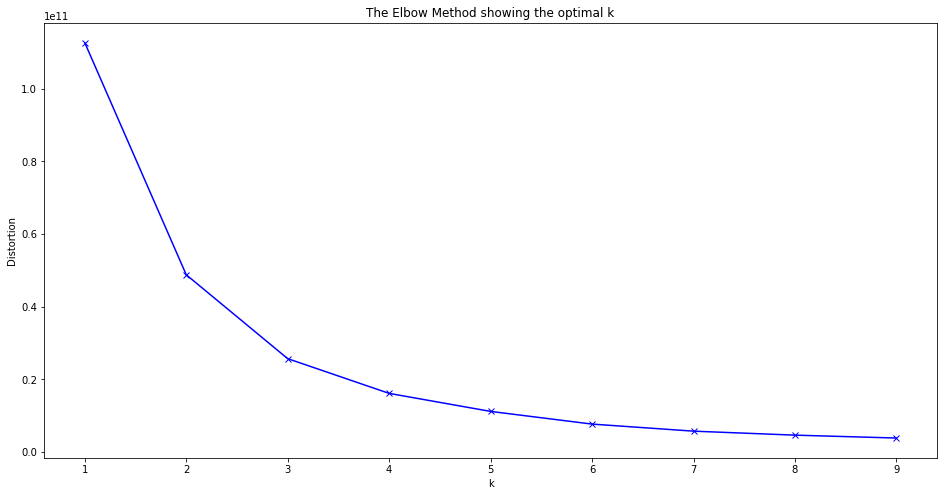

In [22]:
# plot the distortions vs K-value.
# from the graph, we see the elbow point is at k=4
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [23]:
# fit a k means models with k=3 and output the centriods for the 3 clusters
# however, we can not visualize the clusters since we have more than 3 dimensions in the dataset.
kmeanModel = KMeans(n_clusters=3).fit(master_df)
centroids = kmeanModel.cluster_centers_
print(centroids)

[[3.87015556e+02 6.22013333e+02 2.62222222e-01 1.37555556e+00
  4.22955556e+01 1.16200000e+01 1.67876644e+00 1.37460000e+00
  2.22965111e+03 4.48666667e+01 1.15688889e+01 5.64248222e+00
  1.57944556e+04 8.76000000e+00 8.22888889e+00 8.46111111e+00
  1.08133333e+01 4.84444444e-01 5.40000000e-01]
 [3.53977860e+02 9.39597786e+02 1.88191882e-01 1.34686347e+00
  4.28339483e+01 1.31808118e+01 3.43454834e+00 2.62734317e+00
  2.31163469e+03 4.55387454e+01 1.37712177e+01 9.29344613e+00
  3.06246458e+04 1.00110701e+01 9.60147601e+00 8.79151292e+00
  1.05571956e+01 3.39483395e-01 7.85977860e-01]
 [4.31125000e+02 7.22406250e+02 3.12500000e-01 1.09375000e+00
  4.34375000e+01 1.40937500e+01 3.18250625e+00 1.94593750e+00
  2.42059375e+03 4.51562500e+01 1.46250000e+01 1.80137406e+01
  6.16532500e+04 9.71875000e+00 1.02500000e+01 9.48437500e+00
  8.68750000e+00 4.68750000e-01 8.75000000e-01]]


In [24]:
# output the K-means model labels as we see, 0,1, and 2.
import numpy as np
print(np.unique(kmeanModel.labels_,return_counts=True))

(array([0, 1, 2]), array([450, 271,  32], dtype=int64))


In [25]:
# I output the label of each data point
kmeans_3=pd.DataFrame(kmeanModel.labels_,columns=['cluster'])
print(kmeans_3.cluster.value_counts())
kmeans_3.head(10)

0    450
1    271
2     32
Name: cluster, dtype: int64


,cluster
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [26]:
#  We cannot visualize a K-mean has more than 3 dimensions, we have 3 here. 
# So, we need to do feature reduction to reduce to 2 dimensions which we can visualize the cluster.
# I would use PCA to reduce the dimension to 2 dimension
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(master_df)
pca_trans=pca.transform(master_df)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1','pca2'])
kmeans_3=pd.concat([kmeans_3,pca_trans_df], axis=1)
kmeans_3.head()

,cluster,pca1,pca2
0,0,-6757.929456,940.381533
1,0,-1270.355077,969.000214
2,0,-2022.115105,1222.326464
3,0,-15784.322854,-29.876856
4,1,4226.362179,857.363574


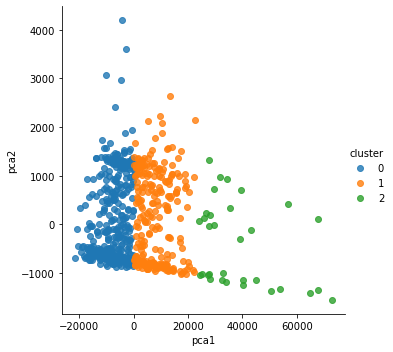

In [27]:
# use seaborn to visualize the cluster with PCA 
import seaborn as sns
fig=sns.lmplot(x='pca1',y='pca2',data=kmeans_3,hue='cluster',fit_reg=False)
plt.show()

In [28]:
# output to see what are the differentiators for the clustering.
clusters_analysis=pd.concat([kmeans_3,master_df], axis=1)
clusters_analysis.groupby('cluster').mean().transpose()

cluster,0,1,2
pca1,-7287.081185,7545.869997,38570.492625
pca2,-42.818228,120.775415,-420.685469
Unnamed: 0,387.015556,353.977860,431.125000
hoursw,622.013333,939.597786,722.406250
child6,0.262222,0.188192,0.312500
child618,1.375556,1.346863,1.093750
agew,42.295556,42.833948,43.437500
educw,11.620000,13.180812,14.093750
hearnw,1.678766,3.434548,3.182506
wagew,1.374600,2.627343,1.945937


Answer: Based on the PCA reduction from the kMeans, we can identify 3 groups that clearly separate the from each other. Clearly, Education and Income plays key roles to separate groups, and this makes perfect sense. It tells us that higher education leads to have more wage, which ends to have higher income. So, womens contribution is greater with higher education and higher wage regardless whether work from home or not.

## <font color=blue size=4> Question #6 What kinds of political decisions could the U.S. Department of Labor make on the basis of your classification and your cluster analysis? </font>

Answer:After evaluating all the models I built, I would recommend to the U.S. Department of Labor to allocate more resources and money on educating women by providing them tuition aid, and more time to go to school. From the analysis, we can see that more education will bring more financial return from the job for women. Meanwhile, if government can provide more baby sitting services, women can use the time to go to school, which can contribute more the society, and that is the value of this model.

----------------------------------------------END------------------------------------------------------------